In [15]:
# Import standard libraries
import os

# Third-Party Libraries
import numpy as np
import matplotlib.pyplot as plt

# Import the Swarm Systems Lab Simulator
from ssl_simulator import SimulationEngine
from ssl_simulator.robot_models import SingleIntegrator
from ssl_simulator.data_manager import load_sim
from ssl_simulator.visualization import set_paper_parameters
set_paper_parameters(fontsize=15)

# Import custom functions and classes
from visualization import PlotBasic, PlotBasicGamma
from controllers import Oscillator

# Define constants for file paths
OUTPUT_DIR = os.path.join("..", "output")
SIMDATA_FILE = os.path.join(OUTPUT_DIR, "data.csv")

# SI following an oscillatory motion

## Fixed $\omega$ and different amplitudes $A$

In [16]:
# Define the initial state
N = 5

p = np.ones((N,2))
x0 = [p]

# Controller settings
speed_fixed = 1.4
A_max = 2
omega_fixed = np.pi/4

speed = np.ones(N) * speed_fixed
A = (np.arange(N)+1)/(N+1) * A_max
omega = np.ones(N) * omega_fixed

# --------------------------------
# Select and initialize the robot model and the controller
robot_model = SingleIntegrator(x0)
controller = Oscillator(A, omega, speed)

# Then, construct the Simulator Engine
dt = 0.01
simulator = SimulationEngine(robot_model, controller, time_step=dt, log_filename=SIMDATA_FILE)

# --------------------------------
# Run the simulation and save data
tf = 2*np.pi/np.max(omega)

simulator.run(tf)
# --------------------------------

Running simulation: 100%|██████████| 800/800 [00:00<00:00, 12340.27it/s]


time: shape (801,)
p: shape (801, 5, 2)
p_dot: shape (801, 5, 2)
u: shape (801, 5, 2)
gamma_A: shape (801, 5)
gamma_omega: shape (801, 5)
gamma: shape (801, 5)
speed: shape (801, 5)
-------------------------
A:
 [0.33333333 0.66666667 1.         1.33333333 1.66666667]
average(x_dot):
 [1.38594703 1.34799356 1.28071086 1.17504875 1.00161785]
-------------------------


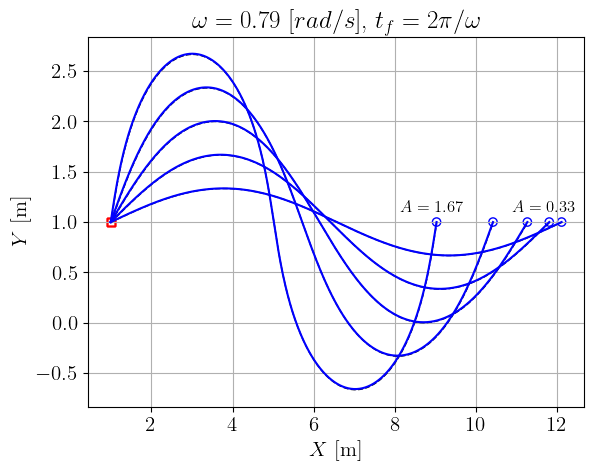

In [17]:
# Load previously saved simulation data from the specified file
simulation_data = load_sim(SIMDATA_FILE, debug=True)

x_dot = np.array(simulation_data["p_dot"].tolist())[:,:,0]

print("-------------------------")
print("A:\n", A)
print("average(x_dot):\n", np.mean(x_dot[:,:], 0))
print("-------------------------")

# Initialize the plotter with the loaded simulation data
plotter = PlotBasicGamma(simulation_data)

# Generate and display the plot
ax = plotter.plot()

x = np.array(simulation_data["p"].tolist())[:,:,0]
y = np.array(simulation_data["p"].tolist())[:,:,1]

ax.set_title(r"$\omega = {:.2f}$ $[rad/s]$, $t_f = 2\pi/\omega$".format(omega[0]))
for i in [0,N-1]:
    ax.text(x[-1,i]*0.9, y[-1,i]*1.1, r"$A={:.2f}$".format(A[i]), fontdict={"size":12})

plt.show()

## Fixed amplitude $A$ and different $\omega$

In [18]:
# Define the initial state
N = 5

p = np.ones((N,2))
x0 = [p]

# Controller settings
speed_fixed = 1.4
A_fixed = 2
omega_max = np.pi/4

speed = np.ones(N) * speed_fixed
A = np.ones(N) * A_fixed
omega = (np.arange(N)+1)/(N+1) * omega_fixed

# --------------------------------
# Select and initialize the robot model and the controller
robot_model = SingleIntegrator(x0)
controller = Oscillator(A, omega, speed)

# Then, construct the Simulator Engine
dt = 0.01
simulator = SimulationEngine(robot_model, controller, time_step=dt, log_filename=SIMDATA_FILE)

# --------------------------------
# Run the simulation and save data
tf = 15
simulator.run(tf)
# --------------------------------

Running simulation: 100%|██████████| 1500/1500 [00:00<00:00, 9253.86it/s]


time: shape (1501,)
p: shape (1501, 5, 2)
p_dot: shape (1501, 5, 2)
u: shape (1501, 5, 2)
gamma_A: shape (1501, 5)
gamma_omega: shape (1501, 5)
gamma: shape (1501, 5)
speed: shape (1501, 5)


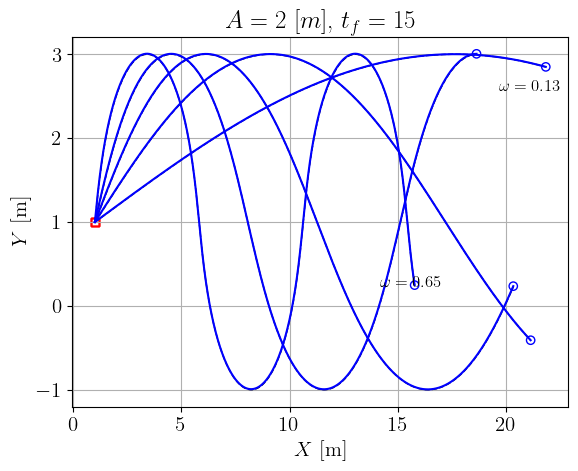

In [19]:
# Load previously saved simulation data from the specified file
simulation_data = load_sim(SIMDATA_FILE, debug=True)

# Initialize the plotter with the loaded simulation data
plotter = PlotBasicGamma(simulation_data)

# Generate and display the plot
ax = plotter.plot()

x = np.array(simulation_data["p"].tolist())[:,:,0]
y = np.array(simulation_data["p"].tolist())[:,:,1]

ax.set_title(rf"$A = {float(A[0]):.0f}$ $[m]$, $t_f = {float(tf):.0f}$")
for i in [0,N-1]:
    ax.text(x[-1,i]*0.9, y[-1,i]*0.9, r"$\omega={:.2f}$".format(omega[i]), fontdict={"size":12})

plt.show()

## Maximum avg(x_dot_i) - avg(x_dot_j)

In [20]:
# Define the initial state
N = 2

p = np.ones((N,2))
x0 = [p]

# Controller settings
speed_fixed = 3
omega_fixed = np.pi/4

speed = np.ones(N) * speed_fixed
omega = np.ones(N) * omega_fixed
A = np.array([0, speed_fixed / omega_fixed])

# --------------------------------
# Select and initialize the robot model and the controller
robot_model = SingleIntegrator(x0)
controller = Oscillator(A, omega, speed)

# Then, construct the Simulator Engine
dt = 0.01
simulator = SimulationEngine(robot_model, controller, time_step=dt, log_filename=SIMDATA_FILE)

# --------------------------------
# Run the simulation and save data
tf = 2*np.pi/np.max(omega)
simulator.run(tf)
# --------------------------------

Running simulation: 100%|██████████| 800/800 [00:00<00:00, 9770.21it/s]


-------------------------
A:
 [0.         3.81971863]
average(x_dot):
 [2.99625468 1.90746517]
-------------------------


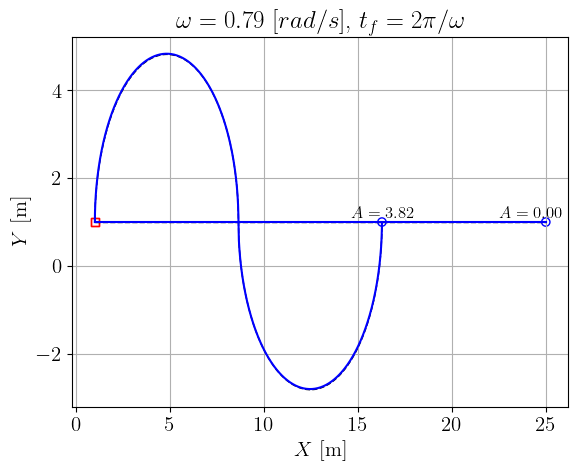

In [21]:
# Load previously saved simulation data from the specified file
simulation_data = load_sim(SIMDATA_FILE, debug=False)

x_dot = np.array(simulation_data["p_dot"].tolist())[:,:,0]

print("-------------------------")
print("A:\n", A)
print("average(x_dot):\n", np.mean(x_dot[:,:], 0))
print("-------------------------")

# Initialize the plotter with the loaded simulation data
plotter = PlotBasicGamma(simulation_data)

# Generate and display the plot
ax = plotter.plot()

x = np.array(simulation_data["p"].tolist())[:,:,0]
y = np.array(simulation_data["p"].tolist())[:,:,1]

ax.set_title(r"$\omega = {:.2f}$ $[rad/s]$, $t_f = 2\pi/\omega$".format(omega[0]))
for i in [0,N-1]:
    ax.text(x[-1,i]*0.9, y[-1,i]*1.1, r"$A={:.2f}$".format(A[i]), fontdict={"size":12})

plt.show()